In [32]:
import os
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from scipy.stats import f
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import binomtest
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns

proj_dir = os.getcwd()

# One sample z test

## Problem 1

In [14]:
# Critical value method
z = (150-140) / (25 / (30**(0.5)))
z

2.1908902300206643

In [16]:
# p-value method
z_prob = 1-stats.norm.cdf(z, loc=0, scale=1)
z_prob

0.014229868458155326

## Problem 2

In [21]:
# Critical value method
z = (180-200) / (120 / (50**(0.5)))
z

-1.1785113019775793

In [25]:
# p-value method
z_prob = stats.norm.cdf(z, loc=0, scale=1)
z_prob

0.11929641465821778

## Problem 3

In [28]:
# Critical value method
z = (105-100) / (20 / (36**(0.5)))
z

1.5

In [32]:
# p-value method
z_prob = 1-stats.norm.cdf(z, loc=0, scale=1)
z_prob

0.06680720126885809

# One sample t-test

In [44]:
df = pd.read_csv(proj_dir+'\\dlvry_times.csv')

In [46]:
df.head()

,sr#,sample
0,1,43
1,2,39
2,3,44
3,4,35
4,5,75


In [48]:
ttest_1samp(df['sample'], 45, alternative='greater')

TtestResult(statistic=2.576635328973826, pvalue=0.008277325170474666, df=24)

# Two sample t-test | Independent samples | Welch’s test

In [61]:
df = pd.read_excel(proj_dir+'\\internet_speed.xlsx')

In [63]:
df.head()

,sr#,Sample_1,Sample_2
0,1,20.272,25.726
1,2,21.238,26.861
2,3,20.228,27.289
3,4,22.636,27.543
4,5,24.475,23.979


In [65]:
df.describe()

,sr#,Sample_1,Sample_2
count,20.00000,15.000000,20.000000
mean,10.50000,22.059267,25.768700
std,5.91608,1.678223,1.503923
min,1.00000,19.098000,23.067000
25%,5.75000,21.081500,24.552000
50%,10.50000,21.685000,25.879500
75%,15.25000,23.209000,26.959000
max,20.00000,25.304000,27.693000


In [67]:
ttest_ind(df['Sample_1'], df['Sample_2'], alternative='two-sided', nan_policy='omit')

TtestResult(statistic=-6.872538312558946, pvalue=7.584320583679845e-08, df=33.0)

# Paired t-test | Dependent samples t-test

In [72]:
df = pd.read_excel(proj_dir+'\\app_usage.xlsx')

In [74]:
df.head()

,sr#,Before,After
0,1,10,15
1,2,12,17
2,3,14,20
3,4,8,14
4,5,11,16


In [76]:
df.describe()

,sr#,Before,After
count,20.00000,20.000000,20.00000
mean,10.50000,10.250000,15.15000
std,5.91608,2.446802,3.09966
min,1.00000,6.000000,10.00000
25%,5.75000,8.750000,12.75000
50%,10.50000,10.000000,15.00000
75%,15.25000,12.000000,17.25000
max,20.00000,15.000000,21.00000


In [78]:
# Be aware of the order of factor in the function
ttest_rel(df['After'], df['Before'], alternative='greater')

TtestResult(statistic=21.46620552864385, pvalue=4.383799478159714e-15, df=19)

In [80]:
ttest_rel(df['Before'], df['After'], alternative='less')

TtestResult(statistic=-21.46620552864385, pvalue=4.383799478159714e-15, df=19)

# Analysis of Variance | ANOVA

In [91]:
df = pd.read_excel(proj_dir+'\\Views_by_Genre.xlsx', sheet_name='Hoja1')

In [93]:
df.head(10)

,sr#,Genre1,Genre2,Genre3
0,1,59,52,44
1,2,51,49,41
2,3,52,53,39
3,4,45,58,38
4,5,49,49,33
5,6,53,49,36
6,7,46,58,38
7,8,54,54,45
8,9,49,48,42
9,10,51,53,31


In [95]:
df.drop('sr#', axis=1, inplace=True)

In [101]:
# Stack the columns using melt()
stacked_df = pd.melt(df, var_name='Genre', value_name='Views')
stacked_df.head(30)

,Genre,Views
0,Genre1,59
1,Genre1,51
2,Genre1,52
3,Genre1,45
4,Genre1,49
5,Genre1,53
6,Genre1,46
7,Genre1,54
8,Genre1,49
9,Genre1,51


In [103]:
formula = 'Views ~ Genre'
model = ols(formula, stacked_df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Genre,2.0,1355.833333,677.916667,31.495028,6.120594e-10
Residual,57.0,1226.900000,21.524561,NaN,NaN


In [107]:
# Significance level
alpha = 0.05

# Degrees of freedom numerator
dfn = 2
# Degrees of freedom denominator
dfd = 57

# Calculate the F critical value
f_critical = f.ppf(1-alpha, dfn, dfd)
f_critical

3.1588427192606465

# Checking assumptions: normality & homogeneity | Shapiro-Wilk test | Levene test

In [132]:
np.random.seed(42)

# Generate random samples
#sample1 = np.random.normal(loc=0, scale=1, size=30)
sample1 = np.random.normal(loc=0, scale=0.5, size=30)
sample2 = np.random.normal(loc=0, scale=1, size=30)

In [134]:
sample1, sample2

(array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
        -0.11706848,  0.78960641,  0.38371736, -0.23473719,  0.27128002,
        -0.23170885, -0.23286488,  0.12098114, -0.95664012, -0.86245892,
        -0.28114376, -0.50641556,  0.15712367, -0.45401204, -0.70615185,
         0.73282438, -0.11288815,  0.0337641 , -0.71237409, -0.27219136,
         0.05546129, -0.57549679,  0.18784901, -0.30031934, -0.14584687]),
 array([-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
         0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
         0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513]))

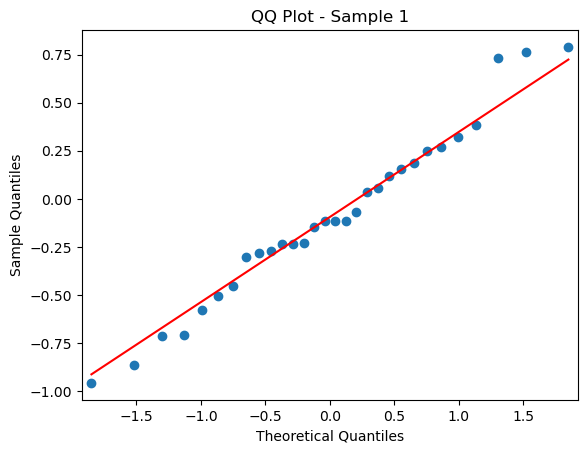

In [136]:
sm.qqplot(sample1, line='s')
plt.title('QQ Plot - Sample 1')
plt.show()

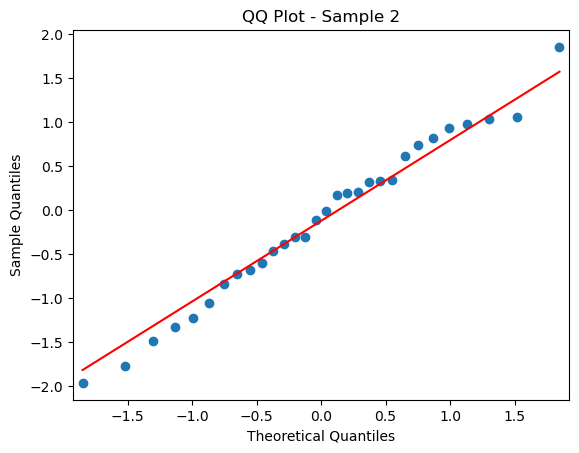

In [138]:
sm.qqplot(sample2, line='s')
plt.title('QQ Plot - Sample 2')
plt.show()

In [140]:
# Shapiro-Wilk test for normality
test_statistic1, p_value1 = shapiro(sample1)
print('Shapiro p_value Sample 1: ', round(p_value1, 3))

test_statistic2, p_value2 = shapiro(sample2)
print('Shapiro p_value Sample 2: ', round(p_value2, 3))
print('Both numbers are greater than 0.05, so the null hypothesis is rejected. This means, the samples are normally distributed')

Shapiro p_value Sample 1:  0.687
Shapiro p_value Sample 2:  0.913
Both numbers are greater than 0.05, so the null hypothesis is rejected. This means, the samples are normally distributed


In [142]:
# Levene's test for homogeneity of variances
test_statistic_levene, p_value_levene = levene(sample1, sample2, center='mean')
print("Levene's p_value for Homogeneity: ", round(p_value_levene, 3))

Levene's p_value for Homogeneity:  0.0


# One sample sign-test | Non-parametric tests

In [153]:
# Sample data of observed positive and negative signs
positive_signs = 6
negative_signs = 8
n = positive_signs+negative_signs

# Perform one sample sign test and obtain p-value
p_value = binomtest( min(positive_signs, negative_signs), n, p=0.5, alternative='two-sided')
p_value

BinomTestResult(k=6, n=14, alternative='two-sided', statistic=0.42857142857142855, pvalue=0.79052734375)

# Wilcoxon signed rank test

In [4]:
df = df = pd.read_excel(proj_dir+'\\Insurance_Offer.xlsx')

In [6]:
df.head()

,Old_Offer,New_Offer,Difference,Abs diff,Rank,Neg Ranks,Pos Ranks
0,385.0,385.0,0.0,0.0,NaN,NaN,NaN
1,348.0,386.0,-38.0,38.0,1.0,1,NaN
2,376.0,300.0,76.0,76.0,2.0,NaN,2
3,368.0,283.0,85.0,85.0,3.0,NaN,3
4,376.0,274.0,102.0,102.0,4.5,NaN,4.5


In [8]:
wilcoxon(df['Old_Offer'], df['New_Offer'], alternative='two-sided', nan_policy='omit')

WilcoxonResult(statistic=26.5, pvalue=0.5629317220458527)

# Mann-Whitney U test

In [19]:
df = df = pd.read_excel(proj_dir+'\\MWU.xlsx')

In [27]:
df.head()

,Group 1,Group 2,Unnamed: 2,Group,Observation,Rank (prep),Rank,Rank (formula)
0,16.0,13.0,NaN,Group 1,11.0,1,1.5,1.5
1,11.0,25.0,NaN,Group 1,11.0,2,1.5,1.5
2,15.0,25.0,NaN,Group 2,13.0,3,4,4.0
3,19.0,13.0,NaN,Group 2,13.0,4,4,4.0
4,20.0,16.0,NaN,Group 2,13.0,5,4,4.0


In [23]:
mannwhitneyu(df['Group 1'], df['Group 2'], nan_policy='omit', alternative='two-sided')

MannwhitneyuResult(statistic=35.0, pvalue=0.6866615954018572)

# Kruskal-Wallis test

In [38]:
df = df = pd.read_excel(proj_dir+'\\Programming_Languages.xlsx')

In [40]:
df.head()

,sr#,P1,P2,P3,Unnamed: 4,n1,n2,n3,N,Unnamed: 9,Language,Score,Rank,Rank Sum
0,1.0,76.0,83.0,48.0,NaN,7,10.000000,8.0,25.0,NaN,P1,76,19.0,96.5
1,2.0,70.0,90.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,P1,70,17.0,NaN
2,3.0,52.0,56.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,P1,52,9.0,NaN
3,4.0,64.0,49.0,47.0,NaN,NaN,1330.321429,NaN,NaN,NaN,P1,64,15.0,NaN
4,5.0,50.0,88.0,37.0,NaN,NaN,3258.025000,NaN,NaN,NaN,P1,50,6.5,NaN


In [44]:
kruskal(df['P1'], df['P2'], df['P3'], nan_policy='omit')

KruskalResult(statistic=12.057319155969383, pvalue=0.002408720517685041)

# Chi-square test of independence

In [15]:
df = df = pd.read_excel(proj_dir+'\\App_preference.xlsx', sheet_name='Hoja1')

In [19]:
df.head()

,Platform,Education
0,P1,Tech
1,P1,Tech
2,P1,Tech
3,P1,Tech
4,P1,Tech


In [23]:
ct = pd.crosstab(df['Platform'], df['Education'])
ct

Education,Non-tech,Tech
Platform,,
P1,6,21
P2,18,15


In [25]:
test_statistic, p_value, dof, table = chi2_contingency(ct, correction = False)

In [27]:
test_statistic, p_value

(6.464646464646466, 0.01100415317686874)

In [29]:
table

array([[10.8, 16.2],
       [13.2, 19.8]])

# One Sample Z test for proportions

In [34]:
df = pd.read_excel(proj_dir+'\\Product_Rating.xlsx', sheet_name='Hoja1')

In [38]:
df.head()

,Customer,Rating,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,5,NaN,Total ratings,200.00,NaN
1,2,3,NaN,5 stars ratings,160.00,NaN
2,3,5,NaN,p_hat,0.80,NaN
3,4,5,NaN,p_not,0.75,NaN
4,5,5,NaN,n,200.00,NaN


In [42]:
count = df[df['Rating'] == 5].shape[0]
nobs = df.shape[0]
value = 0.75

count, nobs, value

(13, 16, 0.75)

In [46]:
proportions_ztest(count, nobs, value, alternative='larger')
# This results are not equal to the tutorial because the file does not have the same data.

(0.6405126152203485, 0.2609196951668077)

# Two sample z test for proportions

In [49]:
df = pd.read_excel(proj_dir+'\\CHD.xlsx', sheet_name='Hoja1')

In [51]:
df.head()

,Diabetics,Non-diabetics,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,0,NaN,n_success_1,28,NaN,NaN,NaN,NaN
1,0,1,NaN,n_1,100,NaN,NaN,NaN,NaN
2,0,0,NaN,p1,0.28,NaN,NaN,NaN,NaN
3,0,0,NaN,n_success_2,15,NaN,NaN,NaN,NaN
4,0,1,NaN,n_2,100,NaN,NaN,NaN,NaN


In [57]:
p1 = df['Diabetics'].sum()
p2 = df['Non-diabetics'].sum()
n1 = df['Diabetics'].count()
n2 = df['Non-diabetics'].count()

# The results are different from the tutorial.
p1, p2, n1, n2

(3, 5, 21, 21)

In [59]:
test_statistic, pvalue = proportions_ztest([p1, p2], [n1, n2], alternative='larger')
test_statistic, pvalue

(-0.7859052479933757, 0.7840385001065039)